- 이미지 사이즈
- 분석 대상이 되는 객체의 위치
- RGB 채널별 통계 값
- target이 될 y에 대한 분석
- y는 저희가 맞추고자 하는 값이며 y값에 대한 특성은 어떤 것이 있을까요?? 
- y값에 독립적 분포 확인
    ex) y_1의 분포는?

- y값 들간의 관계 분포 확인
- ex) y_1, y_2 정보를 섞은 분포는?
- X, y 관계를 확인할 수 있는 분석
- X특성과 y의 특성 간의 분포 차이는 어떻게 있을까요??
- 이미지 사이즈와 y 특성의 관계
- RGB 통계값과 y 특성의 관계
- 객체의 위치와 y 특성의 관계
- 데이터의 노이즈 확인
    ex) y 값이 잘못 부여된것이 있을까??



In [1]:
import pandas as pd
import numpy as np
import torchvision
import matplotlib.pyplot as plt

In [6]:
# path
import os
train_dir = '../input/data/train'
train_meta = os.path.join(train_dir, "train.csv")
train_images = os.path.join(train_dir, "images")

In [8]:
meta_df = pd.read_csv(train_meta)
meta_df.sample(5)

,id,gender,race,age,path
469,001094,male,Asian,23,001094_male_Asian_23
2130,005408,male,Asian,28,005408_male_Asian_28
7,000009,female,Asian,56,000009_female_Asian_56
169,000549,female,Asian,58,000549_female_Asian_58
398,001023,male,Asian,19,001023_male_Asian_19


In [91]:
# variables
age = meta_df['age'].values
gender = meta_df['gender'].values

num_id = len(meta_df)
num_right = num_id *5
num_strange = num_id
num_no = num_id

def make_age(x):
    if x<30:
        return 0
    elif x>=30 and x<60:
        return 1
    else:
        return 2
meta_df['age_class'] = meta_df['age'].apply(make_age)

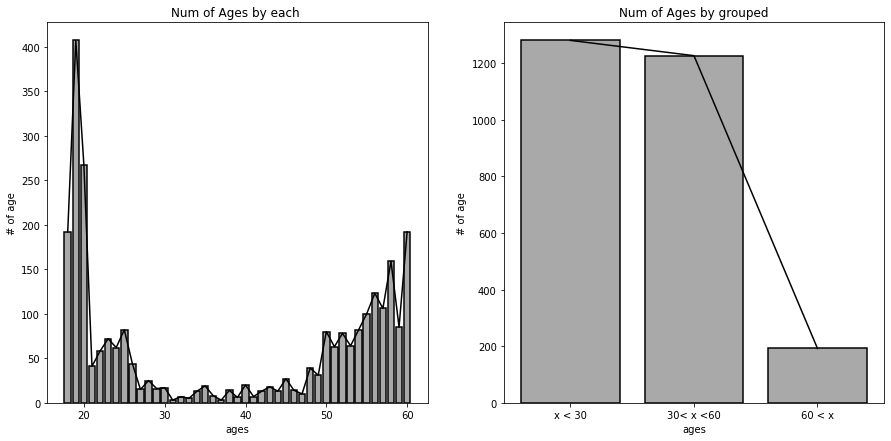

In [81]:
# age distribution
fig, axes = plt.subplots(1,2, figsize = (15,7))

x,y = np.unique(age, return_counts=True)
x_ = ['x < 30', '30< x <60', '60 < x']
y_ = [0,0,0]
for a, b in zip(x,y):
    if a < 30:
        y_[0] += b
    elif a >=30 and a<60:
        y_[1] += b
    else:
        y_[2] += b

xys = [(x,y),(x_,y_)]
titles = ['each ','grouped']
for ax,(x,y),title in zip(axes, xys, titles):
    ax.bar(x,y, color = 'darkgrey',linewidth = 1.5, edgecolor = 'black')
    ax.plot(x,y, color = 'black')
    ax.set_title(f'Num of Ages by {title}')
    ax.set_ylabel('# of age')
    ax.set_xlabel('ages')


60대 이상의 그룹이 다른 그룹에 비해 데이터가 부족하다.   
- 데이터 자체에 60살 까지밖에 표시가 안되어 있는데 이는 data description에 나온 70대 까지를 포함 한 것 인지 확인 할 필요가 있다.
- 60대 이상의 그룹에 대해서 data augmentation이 필요하다.


Text(0.5, 1.0, '# of gender')

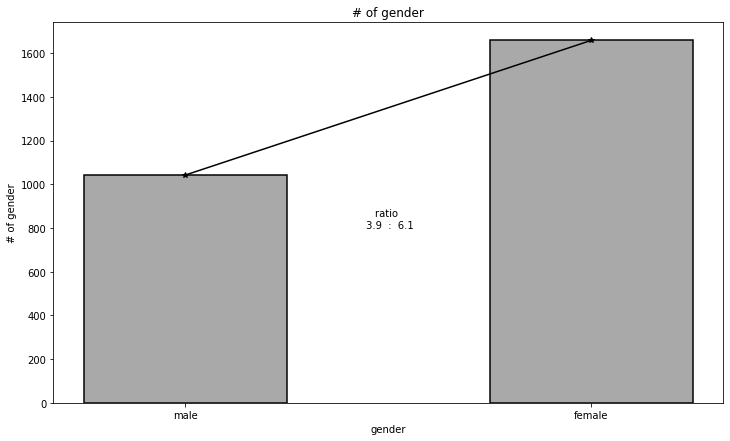

In [179]:
# Gender distribution
female = len(gender[gender=='female'])
male = len(gender[gender == 'male'])

plt.figure(figsize=(12,7))
plt.bar(['male','female'],[male,female], color = 'darkgrey',width=0.5, linewidth = 1.5, edgecolor='black')
plt.plot([male, female], color='black', marker = '*')
plt.text(x=0.5,y=800, s=f"ratio \n {male/(male+female)*10:.1f}  :  {female/(male+female)*10:.1f}",ha = 'center', )
plt.xlabel('gender')
plt.ylabel('# of gender')
plt.title('# of gender')

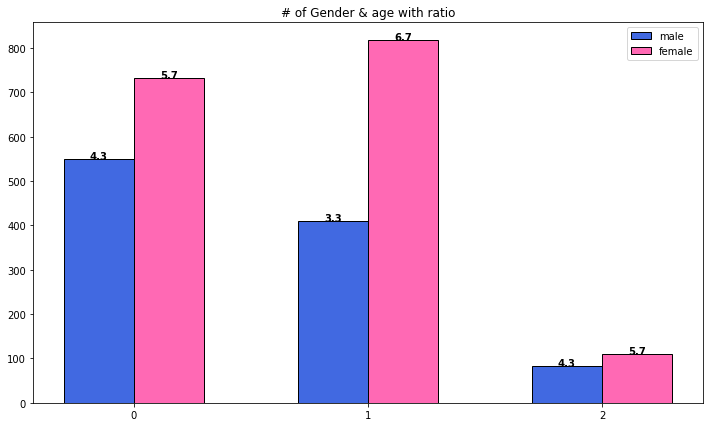

In [184]:
# gender & age
group = meta_df.groupby('gender')['age_class'].value_counts().sort_index()
idx = np.arange(len(group['male'].index))
width = 0.3
plt.figure(figsize=(12,7))   
plt.bar(idx - width/2, group['male'], 
        width=width, label = 'male', linewidth=1.,edgecolor='black',color = 'royalblue')
plt.bar(idx + width/2, group['female'],
        width = width, label = 'female',linewidth=1.,edgecolor='black', color = 'hotpink')
plt.xticks(idx)
plt.legend()
plt.title('# of Gender & age with ratio')

for i, m,f in zip(idx, group['male']/(group['male']+group['female']) , group['female']/(group['male']+group['female'])):
    plt.text(x = i - width/2, y= group['male'][i], s=f'{m*10 :.1f}', ha='center',fontweight='bold')
    plt.text(x = i + width/2, y= group['female'][i], s=f'{f*10:.1f}', ha='center',fontweight='bold')


        

연령 클래스별 남녀 비율은 30대 이하 그룹과 60대 이상그룹에서 `4.3 : 5.7` 로 평균보다 남성의 비율이 높게 나왔고   
30대이상 60대이하 그룹에서는 `3.3 : 6.7` 로 여성의 비율이 높게 나왔다. 